In [1]:
# import libraries

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [12]:
#data preprocessing
train_dataset = ImageDataGenerator(
    'C:/Users/B.Amit Kumar Patro/Documents/ML PROJECT/1Stop/Dog VS Cat CNN/training_set/training_set',
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [13]:
train_generator = train_dataset.flow_from_directory(
        'C:/Users/B.Amit Kumar Patro/Documents/ML PROJECT/1Stop/Dog VS Cat CNN/training_set/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8005 images belonging to 2 classes.


In [15]:
test_dataset = ImageDataGenerator(rescale=1./255)
validation_generator = test_dataset.flow_from_directory(
        'C:/Users/B.Amit Kumar Patro/Documents/ML PROJECT/1Stop/Dog VS Cat CNN/test_set/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2023 images belonging to 2 classes.


In [16]:
# Initialize
cnn = tf.keras.models.Sequential()

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', 
                               input_shape = [64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [18]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [19]:
# Compile the Model
cnn.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [22]:
# Train The Model
history=cnn.fit(x = train_generator, validation_data = validation_generator, epochs = 25)

C:\Users\B.Amit Kumar Patro\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/25
251/251 [==============================] - 111s 441ms/step - loss: 0.5120 - accuracy: 0.7423 - val_loss: 0.4967 - val_accuracy: 0.7716
Epoch 2/25
251/251 [==============================] - 109s 436ms/step - loss: 0.4834 - accuracy: 0.7644 - val_loss: 0.5139 - val_accuracy: 0.7627
Epoch 3/25
251/251 [==============================] - 119s 472ms/step - loss: 0.4730 - accuracy: 0.7703 - val_loss: 0.5192 - val_accuracy: 0.7593
Epoch 4/25
251/251 [==============================] - 129s 515ms/step - loss: 0.4616 - accuracy: 0.7761 - val_loss: 0.4889 - val_accuracy: 0.7771
Epoch 5/25
251/251 [==============================] - 124s 495ms/step - loss: 0.4402 - accuracy: 0.7896 - val_loss: 0.5131 - val_accuracy: 0.7815
Epoch 6/25
251/251 [==============================] - 129s 513ms/step - loss: 0.4320 - accuracy: 0.7981 - val_loss: 0.5299 - val_accuracy: 0.7711
Epoch 7/25
251/251 [==============================] - 121s 480ms/step - loss: 0.4106 - accuracy: 0.8126 - val_loss: 0.5173 -

<AxesSubplot:>

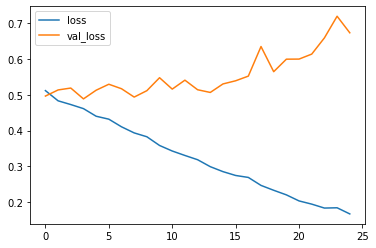

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
hist_df = pd.DataFrame(history.history)
hist_df.loc[:,['loss','val_loss']].plot()